In [95]:
# TO DO

# -- Download the data 
# -- Extract the file
# -- Split the File

# Pytorch Modules
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 
import torchvision.datasets as datasets
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter

#General Modules
from PIL import Image
from tqdm import tqdm
from time import time, sleep
import numpy as np 
import os
import sys
from glob import glob
import pandas as pd
import shutil
# Importing Model

from GoogLeNet import GoogLeNet

import matplotlib.pyplot as plt

In [96]:
model = torch.load("EmotionDetection_FERG_DB_256_GoogLeNet_model.pt")

In [97]:
import torch
import torch.nn as nn

from GoogLeNet import GoogLeNet 

model = GoogLeNet(in_channels = 3, num_classes = 7)
model.load_state_dict(torch.load("EmotionDetection_FERG_DB_256_GoogLeNet_model.pt"))
model.eval()

GoogLeNet(
  (conv1): conv_block(
    (relu): ReLU()
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (max_pool): MaxPool2d(kernel_size=(3, 3), stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
  (conv2): conv_block(
    (relu): ReLU()
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (max_pool1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
  (inception_3a): InceptionModule(
    (branch1): conv_block(
      (relu): ReLU()
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch2): Sequential(
      (0): conv_block(
        (relu): ReLU()
        (conv): Conv2

In [98]:
def infer(name):
    img = Image.open(name).convert('RGB')
    arr = img.resize((224, 224))
    arr = np.asarray(arr)
    arr = arr.reshape((3,224,224))
    arr = torch.tensor(arr,  dtype = torch.float32)
    arr = arr.unsqueeze(dim=0)
    emotions = {'anger': 0, 'disgust':1,'fear':2, 'joy':3, 'neutral':4, 'sadness':5, 'surprise':6}
    location = int(torch.argmax(model(arr)))
    print(f"Prediction :: {list(emotions.keys())[location]}")
    
    try:
        print(f"Reality    :: {name.split('/')[-2]}")
        print(name)
    except:
        pass
    
    plt.imshow(img)
    plt.show()

In [99]:
all_images = glob('Dataset_custom_build/*/*.png')

torch.Size([1, 1024, 1, 1])
torch.Size([1, 1024])
torch.Size([1, 1024])
Prediction :: disgust
Reality    :: disgust
Dataset_custom_build/disgust/920.png


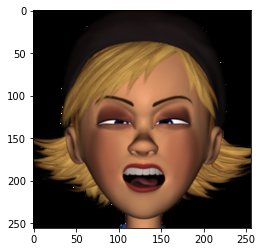

In [104]:
%matplotlib inline
infer(all_images[np.random.randint(0,len(all_images))])
# infer('test.png')